### Interview Attendance Problem

The Dataset consists of details of 1200 + candidates and the interviews they have attended. Also deals with candidate interview attendance for various clients. There are a set of questions that are asked by a recruiter while scheduling the candidate. The answers to these determine whether expected attendance is yes, no or uncertain.

**Objective: ** We would like to know if we can predict whether a candidate will attend interviews or not

**Attributes description:**

1. Date of Interview: This date refers to the day the candidates were scheduled for the interview. The formats vary.<br/>
2. Client name: The clients that gave the recruitment vendor the requisite mandate<br/>
3. Industry: This refers to the vertical the client belongs(Note Candidates can jump across verticals in their job hunt)<br/>
4. LocationRefers: to the current location of the candidate<br/>
5. Position to be closed: Niche refers to rare skill sets while routine refers to more common skill sets<br/>
6. Nature of Skillset: This refers to the skill the client has and specifies the same<br/>
7. Interview Type: There are three types of interview-  <br/>
 * Walkin drives- these are unscheduled. Candidates are either contacted or they come to the interview on their own volition<br/>
 * Scheduled- Here the candidates profiles are screened by the client and subsequent to this, the vendor fixes an appointment between the client and the candidate. <br/>
 * The third one is a scheduled walkin. Here the number of candidates is larger and the candidates are informed beforehand of a tentative date to ascertain their availability. The profiles are screened as in a scheduled interview. In a sense it bears features of both a walk-in and a scheduled interview<br/>
8. Name(Cand ID): This is a substitute to keep the candidates identity a secret<br/>
9. Gender: Whether the candidate is male or female<br/>
10. Candidate Current Location<br/>
11. Candidate Job Location<br/>
12. Interview Venue<br/>
13. Candidate Native location<br/>
14. Have you obtained the necessary permission to start at the required time<br/>
15. Hope there will be no unscheduled meetings<br/>
16. Can I Call you three hours before the interview and follow up on your attendance for the interview<br/>
17. Can I have an alternative number/ desk number. I assure you that I will not trouble you too much<br/>
18. Have you taken a printout of your updated resume. Have you read the JD and understood the same<br/>
19. Are you clear with the venue details and the landmark.<br/>
20. Has the call letter been shared<br/>
21. Expected Attendance: Whether the candidate was expected to attend the interview. Here the it is either yes no or uncertain<br/>
22. Observed Attendance: Whether the candidate attended the interview. This is binary and will form our dependent variable<br/>
23. Marital Status: Whether the candidate is married or Single<br/>


### Importing data <a name='id'></a>

In [1]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# import visualization libraries
import seaborn as sns ### For visualizations
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Interview.csv")

In [3]:
data.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married


**Observations:**<br/>
There are missing values.<br/>
Most of the variables are categorical data.

In [4]:
data1 = data.rename(columns={'Have you obtained the necessary permission to start at the required time': 'permission', 
                             'Hope there will be no unscheduled meetings': 'meetings', 'Can I Call you three hours before the interview and follow up on your attendance for the interview' : 'Reminder',
                             'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much': 'Alternate number',
                             'Have you taken a printout of your updated resume. Have you read the JD and understood the same' :'Resume printout & JD',
                             'Are you clear with the venue details and the landmark.' : 'Venue clear',
                             'Has the call letter been shared' : 'Call letter shared',
                             'Nature of Skillset' : 'Skillset',
                             'Position to be closed' : 'Position',
                             'Candidate Native location' : 'Native',
                             'Candidate Current Location' : 'Current Location'}) ### renaming column names


**Note:**<br/>
Renamed some column names as short and simple

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 23 columns):
Date of Interview         1232 non-null object
Client name               1232 non-null object
Industry                  1232 non-null object
Location                  1232 non-null object
Position                  1232 non-null object
Skillset                  1232 non-null object
Interview Type            1232 non-null object
Name(Cand ID)             1232 non-null object
Gender                    1232 non-null object
Current Location          1232 non-null object
Candidate Job Location    1232 non-null object
Interview Venue           1232 non-null object
Native                    1232 non-null object
permission                1028 non-null object
meetings                  985 non-null object
Reminder                  985 non-null object
Alternate number          985 non-null object
Resume printout & JD      984 non-null object
Venue clear               984 non-null object
Call 

**Observations**<br/>
There are missing values.<br/>
23 columns and 1232 rows

###  Performing Descriptive Statistics on the dataset 

In [6]:
data1.describe()

,Date of Interview,Client name,Industry,Location,Position,Skillset,Interview Type,Name(Cand ID),Gender,Current Location,...,permission,meetings,Reminder,Alternate number,Resume printout & JD,Venue clear,Call letter shared,Expected Attendance,Observed Attendance,Marital Status
count,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,...,1028,985,985,985,984,984,987,1227,1232,1232
unique,95,15,7,11,7,91,6,1232,2,10,...,7,7,5,6,8,6,12,6,8,2
top,06.02.2016,Standard Chartered Bank,BFSI,Chennai,Routine,JAVA/J2EE/Struts/Hibernate,Scheduled Walk In,Candidate 804,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
freq,220,903,948,754,1022,220,456,1,964,754,...,917,948,950,935,939,946,932,882,700,767


***Most of the data seems to be categorical data. There seems to be some missing values in some columns. i.e most columns have 1232 count, some have less count compared to these.

#### Since column names are too big we will rename some of the columns

In [7]:
data1 = data.rename(columns={'Have you obtained the necessary permission to start at the required time': 'permission', 
                             'Hope there will be no unscheduled meetings': 'meetings', 'Can I Call you three hours before the interview and follow up on your attendance for the interview' : 'Reminder',
                             'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much': 'Alternate number',
                             'Have you taken a printout of your updated resume. Have you read the JD and understood the same' :'Resume printout & JD',
                             'Are you clear with the venue details and the landmark.' : 'Venue clear',
                             'Has the call letter been shared' : 'Call letter shared',
                             'Nature of Skillset' : 'Skillset',
                             'Position to be closed' : 'Position',
                             'Candidate Native location' : 'Native',
                             'Candidate Current Location' : 'Current Location'})

In [8]:
data1.info()
#There are some missing values in few columns. There are 23 columns and 1232 rows in total. All columns are categorical in nature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 23 columns):
Date of Interview         1232 non-null object
Client name               1232 non-null object
Industry                  1232 non-null object
Location                  1232 non-null object
Position                  1232 non-null object
Skillset                  1232 non-null object
Interview Type            1232 non-null object
Name(Cand ID)             1232 non-null object
Gender                    1232 non-null object
Current Location          1232 non-null object
Candidate Job Location    1232 non-null object
Interview Venue           1232 non-null object
Native                    1232 non-null object
permission                1028 non-null object
meetings                  985 non-null object
Reminder                  985 non-null object
Alternate number          985 non-null object
Resume printout & JD      984 non-null object
Venue clear               984 non-null object
Call 

### Data cleaning

In [9]:
print(data1['Date of Interview'].unique())

['13.02.2015' '19.06.2015' '23.06.2015' '29.06.2015' '25.06.2015'
 '25.05.16' '25.5.2016' '25-05-2016' '25.05.2016' '25-5-2016' '4/12/2016'
 '13.04.2016' '27.02.2016' '07.05.2016' '5.5.16' '4.5.16' '21.4.16'
 '22.4.16' '23.4.16' '15-Apr-16' '19-Apr-16' '20-Apr-16' '21-Apr-16'
 '22-Apr-16' '25-Apr-16' '18-Apr-16' '11.5.16' '10.5.16' '11.05.16'
 '12.04.2016' '12.04.2017' '12.04.2018' '12.04.2019' '12.04.2020'
 '12.04.2021' '12.04.2022' '12.04.2023' '8.5.16' '7.5.16' '19.03.16'
 '24.05.2016' '5/11/2016' '26/05/2016' '10.05.2016'
 '28.08.2016 & 09.00 AM' '28.08.2016 & 9.30 AM' '28.8.2016 & 12.00 PM'
 '28.08.2016 & 09.30 AM' '28.8.2016 & 10.30 AM' '28.8.2016 & 09.30 AM'
 '28.8.2016 & 04.00 PM' '28.08.2016 & 11.30 AM' '28.08.2016 & 11.00 AM'
 '28.08.2016 & 10.30 AM' '28.8.2016 & 03.00 PM' '28.08.2016 & 10.00 AM'
 '28.8.2016 & 02.00 PM' '28.8.2016 & 11.00 AM' '13.06.2016' '02.09.2016'
 '02.12.2015' '23.02.2016' '22.03.2016' '26.02.2016' '06.02.2016'
 '21.4.2016' '21/04/16' '21.4.15' '22.01.20

*** There are different types of date. Some have '.', some have '-', some have '/'. Hence we need to clean this and get a uniform date format. 

In [10]:
def clean_interviewDate(date):
    date = date.str.strip() #this removes the leading and trailing chars from the string. First convert date to str
    date = date.str.split('&').str[0] #Remove time and get only date. str[0] is the first str after split
    date = date.str.replace('-', '/')
    date = date.str.replace('.', '/')
    date = date.str.replace(' ', '/')
    date = date.str.replace('Apr', '04')
    return date

data1['Date of Interview'] = clean_interviewDate(data1['Date of Interview'])

In [11]:
print(data1['Date of Interview'].unique())

['13/02/2015' '19/06/2015' '23/06/2015' '29/06/2015' '25/06/2015'
 '25/05/16' '25/5/2016' '25/05/2016' '4/12/2016' '13/04/2016' '27/02/2016'
 '07/05/2016' '5/5/16' '4/5/16' '21/4/16' '22/4/16' '23/4/16' '15/04/16'
 '19/04/16' '20/04/16' '21/04/16' '22/04/16' '25/04/16' '18/04/16'
 '11/5/16' '10/5/16' '11/05/16' '12/04/2016' '12/04/2017' '12/04/2018'
 '12/04/2019' '12/04/2020' '12/04/2021' '12/04/2022' '12/04/2023' '8/5/16'
 '7/5/16' '19/03/16' '24/05/2016' '5/11/2016' '26/05/2016' '10/05/2016'
 '28/08/2016/' '28/8/2016/' '13/06/2016' '02/09/2016' '02/12/2015'
 '23/02/2016' '22/03/2016' '26/02/2016' '06/02/2016' '21/4/2016' '21/4/15'
 '22/01/2016' '3/6/16' '3/6/2016' '09/01/2016' '9/1/2016' '03/04/2015'
 '13/03/2015' '17/03/2015' '18/03/2014' '4/04/15' '16/04/2015'
 '17/04/2015' '9/04/2015' '5/2/2015' '30/05/2016' '07/06/2016'
 '20/08/2016' '14/01/2016' '30/1/16' '30/01/2016' '30/01/16' '30/1/2016'
 '06/05/2016']


 *** We can see some year has 4 digits and some have 2. This needs to be cleaned.

In [12]:
# Create new columns for year, month and date
data1['Year'] = data1['Date of Interview'].str.split('/').str[2]
data1['Month'] = data1['Date of Interview'].str.split('/').str[1]
data1['Day'] = data1['Date of Interview'].str.split('/').str[0]

# All year should have 4 digits in them
data1['Year'].replace(['15', '16'], ['2015', '2016'], inplace=True)



In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 26 columns):
Date of Interview         1232 non-null object
Client name               1232 non-null object
Industry                  1232 non-null object
Location                  1232 non-null object
Position                  1232 non-null object
Skillset                  1232 non-null object
Interview Type            1232 non-null object
Name(Cand ID)             1232 non-null object
Gender                    1232 non-null object
Current Location          1232 non-null object
Candidate Job Location    1232 non-null object
Interview Venue           1232 non-null object
Native                    1232 non-null object
permission                1028 non-null object
meetings                  985 non-null object
Reminder                  985 non-null object
Alternate number          985 non-null object
Resume printout & JD      984 non-null object
Venue clear               984 non-null object
Call 

In [14]:
data1.head()

,Date of Interview,Client name,Industry,Location,Position,Skillset,Interview Type,Name(Cand ID),Gender,Current Location,...,Alternate number,Resume printout & JD,Venue clear,Call letter shared,Expected Attendance,Observed Attendance,Marital Status,Year,Month,Day
0,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,No,Single,2015,02,13
1,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,No,Single,2015,02,13
2,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,NaN,NaN,Uncertain,No,Single,2015,02,13
3,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,No,Yes,Yes,Uncertain,No,Single,2015,02,13
4,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,No,Yes,Yes,Yes,Uncertain,No,Married,2015,02,13


In [15]:
data1.tail()

,Date of Interview,Client name,Industry,Location,Position,Skillset,Interview Type,Name(Cand ID),Gender,Current Location,...,Alternate number,Resume printout & JD,Venue clear,Call letter shared,Expected Attendance,Observed Attendance,Marital Status,Year,Month,Day
1227,07/05/2016,Pfizer,Pharmaceuticals,Chennai,Niche,generic drugs – RA,Scheduled,Candidate 1229,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Married,2016,05,07
1228,07/05/2016,Pfizer,Pharmaceuticals,Chennai,Niche,Biosimiliars,Scheduled,Candidate 1230,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Single,2016,05,07
1229,06/05/2016,Pfizer,Pharmaceuticals,Chennai,Niche,Biosimiliars,Scheduled,Candidate 1231,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Married,2016,05,06
1230,06/05/2016,Pfizer,Pharmaceuticals,Chennai,Niche,generic drugs – RA,Scheduled,Candidate 1232,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Single,2016,05,06
1231,06/05/2016,Pfizer,Pharmaceuticals,Chennai,Niche,generic drugs – RA,Scheduled,Candidate 1233,Female,Chennai,...,NaN,NaN,NaN,NaN,Uncertain,Yes,Single,2016,05,06


In [16]:
# Drop old date column
data1.drop(['Date of Interview'], axis = 1, inplace = True)

In [17]:
data1['Year'].value_counts()

2016    1013
2015     208
2014       4
2022       1
2021       1
2020       1
2023       1
2018       1
2017       1
2019       1
Name: Year, dtype: int64

*** Most of the interviews are scheduled in the year 2016 followed by 2015. Very few in the coming years.

In [18]:
# Lets look into the Client_name column
data1['Client name'].value_counts()

Standard Chartered Bank            903
Pfizer                              75
Hospira                             75
Aon Hewitt                          28
Flextronics                         23
ANZ                                 22
Hewitt                              20
UST                                 18
Standard Chartered Bank Chennai     17
Prodapt                             17
Astrazeneca                         15
Williams Lea                        11
Barclays                             5
Aon hewitt Gurgaon                   2
Woori Bank                           1
Name: Client name, dtype: int64

In [19]:
# There are certain typos, so we group those names into a single client name
data1['Client name'].replace(['Standard Chartered Bank Chennai', 'Aon hewitt Gurgaon', 'Hewitt'], ['Standard Chartered Bank', 'Aon Hewitt', 'Aon Hewitt'], inplace=True)

In [20]:
# Analysis of Industry column
data1['Industry'].value_counts()

BFSI                        948
Pharmaceuticals             165
IT Products and Services     45
IT Services                  23
Electronics                  23
Telecom                      17
IT                           11
Name: Industry, dtype: int64

In [21]:
data1['Industry'].replace(['IT Products and Services', 'IT Services'], ['IT', 'IT'], inplace=True)

In [22]:
# Location column
data1['Location'].value_counts()

Chennai       754
Bangalore     291
chennai        86
Hyderabad      38
Gurgaon        33
Noida          15
- Cochin-       9
chennai         3
CHENNAI         1
Delhi           1
Gurgaonr        1
Name: Location, dtype: int64

In [23]:
data1['Location'].replace(['CHENNAI','chennai','Gurgaonr','- Cochin-'], 
                              ['Chennai', 'Chennai', 'Gurgaon','Cochin'], inplace = True)

In [24]:
data1['Position'].value_counts()

Routine                1022
Niche                   163
Dot Net                  18
Trade Finance            11
AML                       8
Production- Sterile       5
Selenium testing          5
Name: Position, dtype: int64

*** All values in Position looks fine.

In [25]:
# Interview type column
data1['Interview Type'].value_counts()

Scheduled Walk In    456
Scheduled            370
Walkin               189
Scheduled Walkin     189
Walkin                27
Sceduled walkin        1
Name: Interview Type, dtype: int64

In [26]:
data1['Interview Type'].replace(['Scheduled Walk In', 'Sceduled walkin'],
                                       ['Scheduled Walkin', 'Scheduled Walkin'], inplace = True)

In [27]:
data1['Gender'].value_counts()

Male      964
Female    268
Name: Gender, dtype: int64

*** Gender column is fine without typos.

In [28]:
data1['Current Location'].value_counts()

Chennai       754
Bangalore     291
chennai        86
Hyderabad      38
Gurgaon        34
Noida          15
- Cochin-       9
chennai         3
CHENNAI         1
Delhi           1
Name: Current Location, dtype: int64

In [29]:
data1['Current Location'].replace(['- Cochin-', 'chennai', 'CHENNAI'],['Cochin', 'Chennai', 'Chennai'], inplace = True)

In [30]:
data1['Candidate Job Location'].value_counts()

Chennai          893
Bangalore        258
Gurgaon           35
Visakapatinam     21
Noida             15
- Cochin-          9
Hosur              1
Name: Candidate Job Location, dtype: int64

In [31]:
data1['Candidate Job Location'].replace(['- Cochin-'],['Cochin'], inplace = True)

In [32]:
data1['Interview Venue'].value_counts()

Chennai       852
Bangalore     276
Hyderabad      40
Gurgaon        35
Noida          15
- Cochin-       9
Hosur           5
Name: Interview Venue, dtype: int64

In [33]:
data1['Interview Venue'].replace(['- Cochin-'],['Cochin'], inplace = True)

In [34]:
data1['Native'].value_counts()

Chennai          595
Hyderabad        172
Bangalore        151
Gurgaon           26
Cuttack           25
Cochin            24
Pune              22
Coimbatore        21
Allahabad         20
Noida             17
Nagercoil         16
Visakapatinam     16
Kolkata           14
Trivandrum        14
Trichy            13
Vellore           12
Mumbai             7
Chitoor            6
Chandigarh         5
- Cochin-          5
Ahmedabad          5
Pondicherry        5
Vijayawada         4
Delhi              4
Warangal           3
Salem              3
Hosur              3
Tirupati           3
Delhi /NCR         2
Patna              2
Ambur              2
Tuticorin          1
Ghaziabad          1
Belgaum            1
Anantapur          1
Panjim             1
Kanpur             1
Faizabad           1
Kurnool            1
Tanjore            1
Mysore             1
Bhubaneshwar       1
Baddi              1
Agra               1
Lucknow            1
Hissar             1
Name: Native, dtype: int64

*** Most of the people giving interview are from the big cities like Chennai, Hyderabad and Bangalore

In [35]:
data1['Native'].replace(['- Cochin-'],['Cochin'], inplace = True)

In [36]:
data1['permission'].value_counts()

Yes               917
No                 79
Not yet            18
Na                  5
Yet to confirm      4
yes                 4
NO                  1
Name: permission, dtype: int64

In [37]:
data1['permission'].replace(['NO', 'yes', 'yet to confirm'],['No','Yes', 'Not yet'], inplace = True)

In [38]:
data1['meetings'].value_counts()

Yes         948
Na           20
No            6
yes           5
Not sure      4
cant Say      1
Not Sure      1
Name: meetings, dtype: int64

In [39]:
data1['meetings'].replace(['Na', 'Not sure','Not Sure', 'cant Say', 'yes'], 
                              ['NA', 'unsure','unsure', 'unsure', 'Yes'], inplace = True)

In [40]:
data1['Reminder'].value_counts()

Yes        950
Na          20
No          10
yes          4
No Dont      1
Name: Reminder, dtype: int64

In [41]:
data1['Reminder'].replace(['Na', 'No Dont', 'yes'], 
                              ['NA', 'No', 'Yes'], inplace = True)

In [42]:
data1['Alternate number'].value_counts()

Yes                          935
No                            27
Na                            19
No I have only thi number      2
yes                            1
na                             1
Name: Alternate number, dtype: int64

In [43]:
data1['Alternate number'].replace(['Na','na','No I have only thi number', 'yes'], 
                              ['NA', 'NA','No', 'Yes'], inplace = True)

In [44]:
data1['Resume printout & JD'].value_counts()

Yes                      939
Na                        19
No                        16
Not Yet                    4
yes                        2
Not yet                    2
No- will take it soon      1
na                         1
Name: Resume printout & JD, dtype: int64

In [45]:
data1['Resume printout & JD'].replace(['Na','Not Yet','na','yes','No- will take it soon'], 
                              ['NA', 'Not yet', 'NA', 'Yes', 'No'], inplace = True)

In [46]:
data1['Venue clear'].value_counts()

Yes                    946
Na                      19
No                      14
No- I need to check      2
yes                      2
na                       1
Name: Venue clear, dtype: int64

In [47]:
data1['Venue clear'].replace(['Na', 'na', 'no', 'yes', 'No- I need to check'], 
                              ['NA', 'NA','No', 'Yes', 'No'], inplace = True)

In [48]:
data1['Call letter shared'].value_counts()

Yes               932
Na                 19
No                 17
Not Sure            8
Need To Check       3
Not yet             2
Havent Checked      1
na                  1
Not sure            1
no                  1
yes                 1
Yet to Check        1
Name: Call letter shared, dtype: int64

In [49]:
data1['Call letter shared'].replace(['Na', 'na', 'no', 'yes', 'Need To Check', 'Not yet', 'Not Sure'], 
                              ['NA', 'NA','No', 'Yes', 'Need to Check', 'No', 'Not sure'], inplace = True)

In [50]:
data1['Expected Attendance'].value_counts()

Yes          882
Uncertain    250
No            59
NO            34
10.30 Am       1
yes            1
Name: Expected Attendance, dtype: int64

In [51]:
data1['Expected Attendance'].replace(['NO', 'yes','10.30 am'], 
                              ['No', 'Yes', 'NA'], inplace = True)

In [52]:
data1['Observed Attendance'].value_counts()

Yes     700
No      401
yes      81
NO       35
no        7
No        6
yes       1
no        1
Name: Observed Attendance, dtype: int64

In [53]:
data1['Observed Attendance'].replace(['NO', 'yes','no', 'No ', 'no ', 'yes '], 
                              ['No', 'Yes', 'No', 'No', 'No', 'Yes'], inplace = True)

In [54]:
data1['Marital Status'].value_counts()

Single     767
Married    465
Name: Marital Status, dtype: int64

*** Since there are more than 100 unique values in the skill set column, we will drop them for our analysis. Name of the candidate is also irrelevant in predicting the interview. Hence we drop that also.

In [55]:
data2 = data1.drop(['Skillset', 'Name(Cand ID)'], axis = 1)

###   Removing missing values from the data frame if any

In [56]:
data2.replace("NA", np.nan,inplace = True)
data2.isnull().sum()

Client name                 0
Industry                    0
Location                    0
Position                    0
Interview Type              0
Gender                      0
Current Location            0
Candidate Job Location      0
Interview Venue             0
Native                      0
permission                204
meetings                  267
Reminder                  267
Alternate number          267
Resume printout & JD      268
Venue clear               268
Call letter shared        265
Expected Attendance         5
Observed Attendance         0
Marital Status              0
Year                        0
Month                       0
Day                         0
dtype: int64

*** Major missing values in columns like permission, meetings, Reminder, Alternate number, Resume printout & JD, Venue clear and Call letter shared.

*** Lets fill the missing values with forward fill and backward fill.

In [57]:
data3 = data2.ffill().bfill()

In [58]:
data3.isnull().sum()

Client name               0
Industry                  0
Location                  0
Position                  0
Interview Type            0
Gender                    0
Current Location          0
Candidate Job Location    0
Interview Venue           0
Native                    0
permission                0
meetings                  0
Reminder                  0
Alternate number          0
Resume printout & JD      0
Venue clear               0
Call letter shared        0
Expected Attendance       0
Observed Attendance       0
Marital Status            0
Year                      0
Month                     0
Day                       0
dtype: int64

In [59]:
cat_columns = data3[['Client name', 'Industry', 'Location', 'Position','Interview Type', 'Gender', 'Current Location', 'Candidate Job Location',
                    'Interview Venue', 'Native', 'permission', 'meetings', 'Reminder', 'Alternate number', 'Resume printout & JD', 'Venue clear',
                    'Call letter shared', 'Expected Attendance', 'Marital Status', 'Observed Attendance']]

In [60]:
num_columns = data3[['Year', 'Day', 'Month']]

###  Perform EDA and finding  correlation

#### Gender Vs Observed Attendance

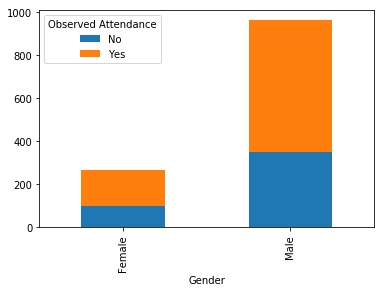

In [61]:
gen = data3.groupby(['Gender', 'Observed Attendance']).size().unstack()
gen.plot(kind = 'bar', stacked = True)

In [62]:
gen['perc'] = (gen['No']/(gen['Yes'] + gen['No']))
gen

Observed Attendance,No,Yes,perc
Gender,,,
Female,99,169,0.369403
Male,351,613,0.364108


*** 36% of the male and female do not show up for the interview.

#### Marital Status Vs Observed Attendance

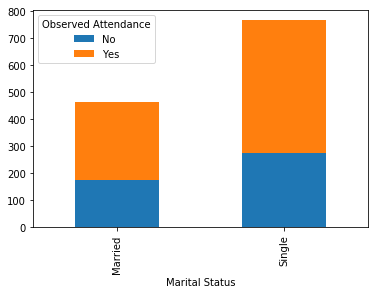

In [63]:
mar = data3.groupby(['Marital Status', 'Observed Attendance']).size().unstack()
mar.plot(kind = 'bar', stacked = True)

In [64]:
mar['perc'] = (mar['No']/(mar['Yes'] + mar['No']))
mar

Observed Attendance,No,Yes,perc
Marital Status,,,
Married,176,289,0.378495
Single,274,493,0.357236


*** 37% of married people do not show up for the interview. Married people have more responsibilities after marriage.

#### Call letter shared vs Observed Attendance

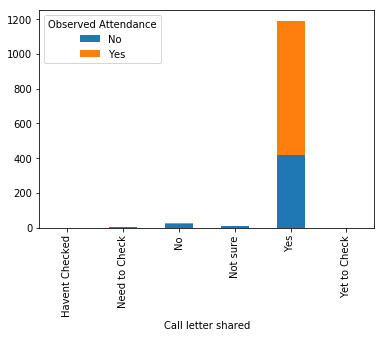

In [65]:
call = data3.groupby(['Call letter shared', 'Observed Attendance']).size().unstack()
call.plot(kind = 'bar', stacked = True)

In [66]:
call['perc'] = (call['No']/(call['No'] + call['Yes']))
call['perc']

Call letter shared
Havent Checked         NaN
Need to Check          NaN
No                0.769231
Not sure          0.888889
Yes               0.351510
Yet to Check           NaN
Name: perc, dtype: float64

*** 35% of the people who got call letters still didn't attend the interviews.

#### Reminder Vs Observed Attendance

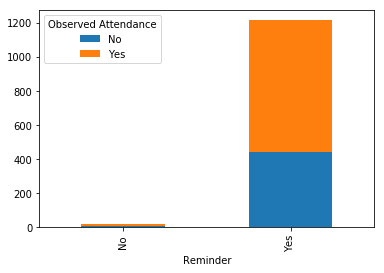

In [67]:
rem = data3.groupby(['Reminder', 'Observed Attendance']).size().unstack()
rem.plot(kind = 'bar', stacked = True)

In [68]:
rem['perc'] = (rem['No']/(rem['Yes'] + rem['No']))
rem

Observed Attendance,No,Yes,perc
Reminder,,,
No,10,9,0.526316
Yes,440,773,0.362737


*** 36% of people got reminders but didn't attend the interviews. They are not giving importance to the reminders sent to them in advance.

####  Month vs Observed Attendance

In [69]:
data3['Month'].value_counts()
# Lets make month format uniform

02    304
04    178
06    107
12    105
01     89
05     86
4      68
5      66
03     63
09     43
08     36
1      32
11     25
6      14
8       9
2       7
Name: Month, dtype: int64

In [70]:
data3['Month'].replace(['5', '4','1','6', '8', '2'], 
                        ['05', '04', '01', '06', '08', '02'], inplace = True)

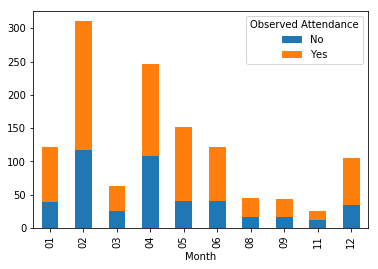

In [71]:
mon = data3.groupby(['Month', 'Observed Attendance']).size().unstack()
mon.plot(kind = 'bar', stacked = True)

In [72]:
mon['perc'] = (mon['No']/(mon['Yes'] + mon['No']))
mon

Observed Attendance,No,Yes,perc
Month,,,
01,39,82,0.322314
02,117,194,0.376206
03,26,37,0.412698
04,108,138,0.439024
05,40,112,0.263158
06,41,80,0.338843
08,16,29,0.355556
09,16,27,0.372093
11,12,13,0.480000


*** 48% people in Nov didn't show up for interview due to holiday season. Most people show up for interview(only 26% not showing up) in the month of May because the new financial year starts and because of appraisals in the current company.

#### Interview Venue Vs Observed Attendance

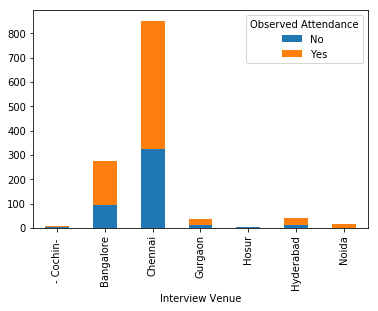

In [73]:
ven = data3.groupby(['Interview Venue', 'Observed Attendance']).size().unstack()
ven.plot(kind = 'bar', stacked = True)

In [74]:
ven['perc'] = (ven['No']/(ven['Yes'] + ven['No']))
ven

Observed Attendance,No,Yes,perc
Interview Venue,,,
- Cochin-,3.0,6.0,0.333333
Bangalore,94.0,182.0,0.340580
Chennai,325.0,527.0,0.381455
Gurgaon,10.0,25.0,0.285714
Hosur,5.0,NaN,NaN
Hyderabad,12.0,28.0,0.300000
Noida,1.0,14.0,0.066667


*** None of the candidates from Hosur is attending the interview and 38% (highest) of people dont attend interview in Chennai location. Almost 99% of people in Noida did attend the interview.

#### Label encoding - Convert all categorical data to numerical columns for easy caluclation and understanding.

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_columns.columns:
    cat_columns[col] = le.fit_transform(cat_columns[col])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [76]:
TransformedData = pd.DataFrame(cat_columns)

In [77]:
TransformedData.head()

,Client name,Industry,Location,Position,Interview Type,Gender,Current Location,Candidate Job Location,Interview Venue,Native,permission,meetings,Reminder,Alternate number,Resume printout & JD,Venue clear,Call letter shared,Expected Attendance,Marital Status,Observed Attendance
0,5,3,2,3,1,1,2,4,4,22,3,1,1,1,2,1,4,3,1,0
1,5,3,2,3,1,1,2,1,4,39,3,1,1,1,2,1,4,3,1,0
2,5,3,2,3,1,1,2,2,4,11,3,1,1,1,2,1,4,2,1,0
3,5,3,2,3,1,1,2,2,4,11,3,1,0,1,0,1,4,2,1,0
4,5,3,2,3,1,1,2,1,4,11,3,1,1,0,2,1,4,2,0,0


#### Correlation 

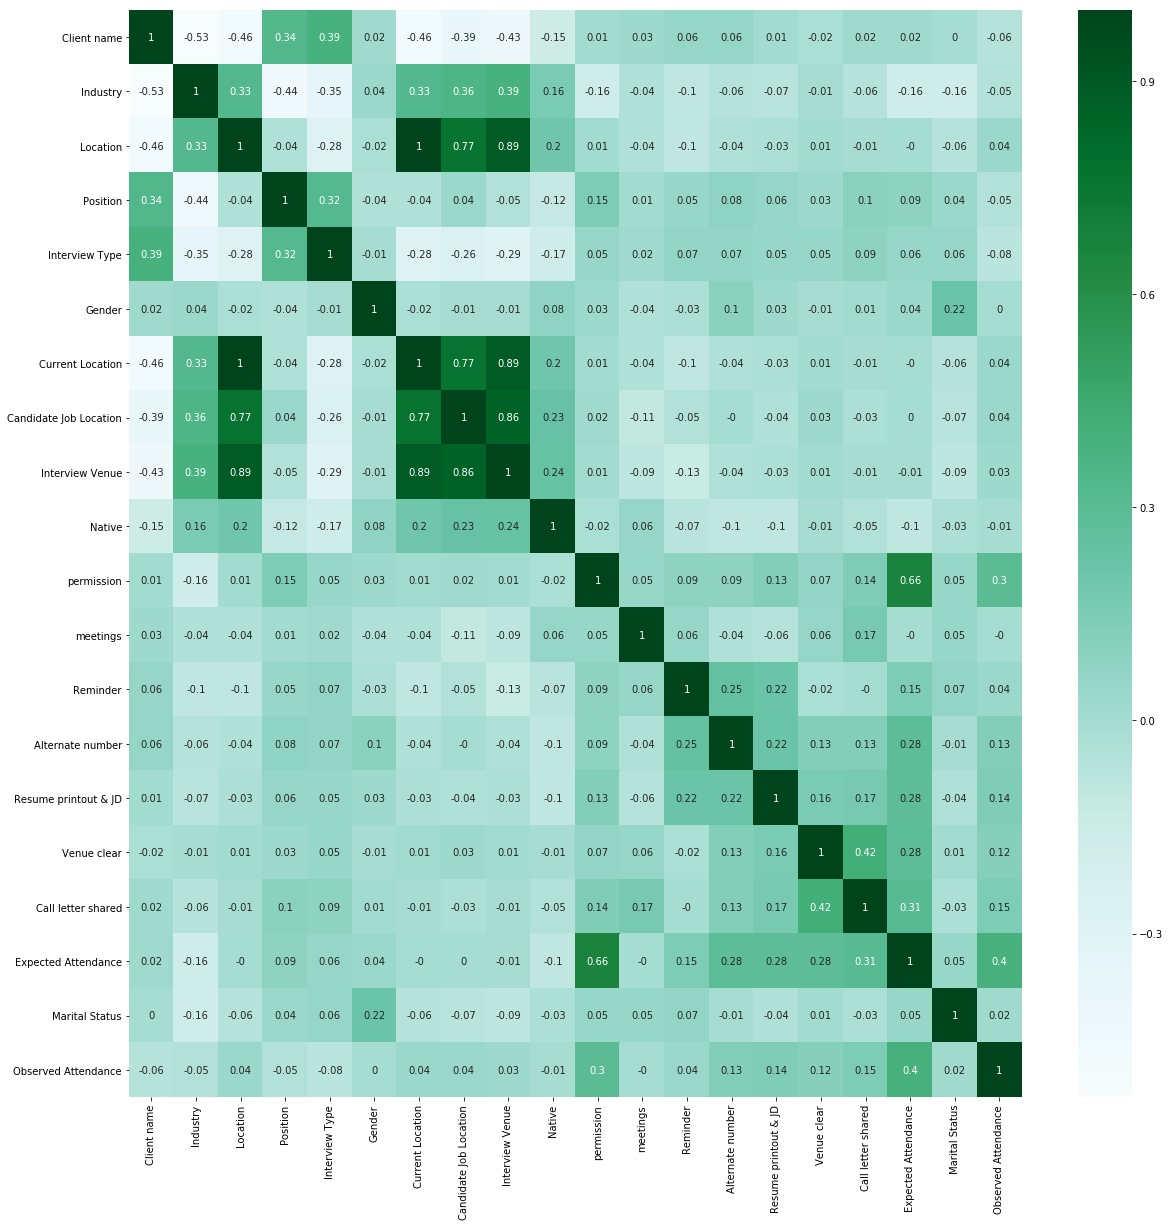

In [78]:
plt.figure(figsize=(20,20))
corr = np.round(TransformedData.corr(), 2)
sns.heatmap(corr, cmap='BuGn', annot=True)

*** Location and interview venue are highly correlated and hence can be dropped from df.

In [79]:
TransformedData.drop(['Location', 'Interview Venue'], axis=1, inplace=True)

In [80]:
TransformedData.head()

,Client name,Industry,Position,Interview Type,Gender,Current Location,Candidate Job Location,Native,permission,meetings,Reminder,Alternate number,Resume printout & JD,Venue clear,Call letter shared,Expected Attendance,Marital Status,Observed Attendance
0,5,3,3,1,1,2,4,22,3,1,1,1,2,1,4,3,1,0
1,5,3,3,1,1,2,1,39,3,1,1,1,2,1,4,3,1,0
2,5,3,3,1,1,2,2,11,3,1,1,1,2,1,4,2,1,0
3,5,3,3,1,1,2,2,11,3,1,0,1,0,1,4,2,1,0
4,5,3,3,1,1,2,1,11,3,1,1,0,2,1,4,2,0,0


###  Perform classification using Naive Bayes algorithm and explaining the performance

#### Seperating features and labels 

In [81]:
y = TransformedData['Observed Attendance']
TransformedData.drop(['Observed Attendance'], axis=1 ,inplace=True)

#### Seperating train and test data

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(TransformedData, y, test_size=0.2, random_state=42)

In [83]:

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(985, 17)
(985,)
(247, 17)
(247,)


In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn import metrics

# Create a Gaussian model
model = GaussianNB()

# Train the model using train data
model = model.fit(x_train, y_train)

# Predict data from model using test data
y_pred = model.predict(x_test)

#### Evaluate the model performance

In [85]:
print(metrics.confusion_matrix(y_pred, y_test))
print(metrics.classification_report(y_pred, y_test))
print(metrics.roc_auc_score(y_pred, y_test))
print(metrics.accuracy_score(y_pred, y_test))

[[ 35  10]
 [ 56 146]]
              precision    recall  f1-score   support

           0       0.38      0.78      0.51        45
           1       0.94      0.72      0.82       202

   micro avg       0.73      0.73      0.73       247
   macro avg       0.66      0.75      0.67       247
weighted avg       0.84      0.73      0.76       247

0.7502750275027503
0.7327935222672065


*** Above avg accuracy score with average area under curve score. Decent precison and recall values.